In [2]:
import pickle
import os
import pathlib
#from tpot import TPOTClassifier
import sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import os, uuid, matplotlib
import matplotlib.pyplot as plt
from sklearn import tree

# Scoring Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('MyData')

In [4]:
data.columns

Index(['Case_ID', 'Hold_Out', 'fta', 'Case_Type = Misdemeanor',
       'Case_Type is unknown', 'COUNT(docket)', 'PERCENT_TRUE(docket.fta)',
       'NUM_UNIQUE(docket.judge)', 'NUM_UNIQUE(docket.charge_type)',
       'COUNT(receipts)', 'SUM(receipts.Payment_Amount)',
       'AVG_TIME_BETWEEN(receipts.Receipt_Date)',
       'TIME_SINCE_LAST(receipts.Receipt_Date)',
       'TIME_SINCE_FIRST(receipts.Receipt_Date)', 'COUNT(parties)',
       'NUM_UNIQUE(parties.party_attorney)', 'NUM_UNIQUE(parties.party_label)',
       'PERCENTILE(fta)', 'YEAR(File_Date) = 2012', 'YEAR(File_Date) = 2013',
       'YEAR(File_Date) = 2017', 'YEAR(File_Date) = 2014',
       'YEAR(File_Date) = 2016', 'YEAR(File_Date) = 2018',
       'YEAR(File_Date) = 2011', 'YEAR(File_Date) = 2010',
       'YEAR(File_Date) = 2015', 'YEAR(File_Date) = 2009',
       'YEAR(File_Date) = 2019', 'YEAR(File_Date) = 2007',
       'YEAR(File_Date) = 2008', 'YEAR(File_Date) = 2006',
       'YEAR(File_Date) is unknown', 'MONTH(File_Date)

In [5]:
data.drop(['Case_ID','PERCENTILE(fta)','PERCENT_TRUE(docket.fta)','Case_Type = Misdemeanor','COUNT(receipts)', 'SUM(receipts.Payment_Amount)','AVG_TIME_BETWEEN(receipts.Receipt_Date)','TIME_SINCE_LAST(receipts.Receipt_Date)', 'TIME_SINCE_FIRST(receipts.Receipt_Date)'], axis=1, inplace=True)

In [6]:
holdout_data = data[data['Hold_Out']==True]
holdout_data.loc['label'] = holdout_data['fta'].fillna(value=0).copy()

training_data = data[data['Hold_Out']==False]
training_data.loc['labels'] = training_data['fta'].fillna(value=0).copy()

C:\Users\TJ\AppData\Local\Continuum\anaconda3\envs\FTA\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
holdout_data.columns

Index(['Hold_Out', 'fta', 'Case_Type is unknown', 'COUNT(docket)',
       'NUM_UNIQUE(docket.judge)', 'NUM_UNIQUE(docket.charge_type)',
       'COUNT(parties)', 'NUM_UNIQUE(parties.party_attorney)',
       'NUM_UNIQUE(parties.party_label)', 'YEAR(File_Date) = 2012',
       'YEAR(File_Date) = 2013', 'YEAR(File_Date) = 2017',
       'YEAR(File_Date) = 2014', 'YEAR(File_Date) = 2016',
       'YEAR(File_Date) = 2018', 'YEAR(File_Date) = 2011',
       'YEAR(File_Date) = 2010', 'YEAR(File_Date) = 2015',
       'YEAR(File_Date) = 2009', 'YEAR(File_Date) = 2019',
       'YEAR(File_Date) = 2007', 'YEAR(File_Date) = 2008',
       'YEAR(File_Date) = 2006', 'YEAR(File_Date) is unknown',
       'MONTH(File_Date) = 3', 'MONTH(File_Date) = 5', 'MONTH(File_Date) = 8',
       'MONTH(File_Date) = 4', 'MONTH(File_Date) = 6', 'MONTH(File_Date) = 7',
       'MONTH(File_Date) = 10', 'MONTH(File_Date) = 9', 'MONTH(File_Date) = 1',
       'MONTH(File_Date) = 2', 'MONTH(File_Date) = 11',
       'MONTH(File_Dat

In [8]:
holdout_data.drop(['Hold_Out', 'fta'],  axis=1, inplace  = True)

C:\Users\TJ\AppData\Local\Continuum\anaconda3\envs\FTA\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
training_data.drop(['Hold_Out', 'fta'],  axis=1, inplace  = True)

In [10]:

training_data.columns

Index(['Case_Type is unknown', 'COUNT(docket)', 'NUM_UNIQUE(docket.judge)',
       'NUM_UNIQUE(docket.charge_type)', 'COUNT(parties)',
       'NUM_UNIQUE(parties.party_attorney)', 'NUM_UNIQUE(parties.party_label)',
       'YEAR(File_Date) = 2012', 'YEAR(File_Date) = 2013',
       'YEAR(File_Date) = 2017', 'YEAR(File_Date) = 2014',
       'YEAR(File_Date) = 2016', 'YEAR(File_Date) = 2018',
       'YEAR(File_Date) = 2011', 'YEAR(File_Date) = 2010',
       'YEAR(File_Date) = 2015', 'YEAR(File_Date) = 2009',
       'YEAR(File_Date) = 2019', 'YEAR(File_Date) = 2007',
       'YEAR(File_Date) = 2008', 'YEAR(File_Date) = 2006',
       'YEAR(File_Date) is unknown', 'MONTH(File_Date) = 3',
       'MONTH(File_Date) = 5', 'MONTH(File_Date) = 8', 'MONTH(File_Date) = 4',
       'MONTH(File_Date) = 6', 'MONTH(File_Date) = 7', 'MONTH(File_Date) = 10',
       'MONTH(File_Date) = 9', 'MONTH(File_Date) = 1', 'MONTH(File_Date) = 2',
       'MONTH(File_Date) = 11', 'MONTH(File_Date) = 12',
       'MONTH(Fi

In [11]:
training_data.fillna(0, inplace = True)

C:\Users\TJ\AppData\Local\Continuum\anaconda3\envs\FTA\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [12]:
training_data.head()

Case_Type is unknown  COUNT(docket)  NUM_UNIQUE(docket.judge)  \
0                   0.0           10.0                       2.0   
1                   0.0           27.0                       4.0   
2                   0.0           41.0                       2.0   
3                   0.0           44.0                       2.0   
4                   0.0           28.0                       2.0   

   NUM_UNIQUE(docket.charge_type)  COUNT(parties)  \
0                             1.0             1.0   
1                             1.0             1.0   
2                             1.0             1.0   
3                             1.0             1.0   
4                             1.0             1.0   

   NUM_UNIQUE(parties.party_attorney)  NUM_UNIQUE(parties.party_label)  \
0                                 1.0                              1.0   
1                                 1.0                              1.0   
2                                 1.0                              1.0   
3                                 1.0                              1.0   
4                                 1.0                              1.0   

   YEAR(File_Date) = 2012  YEAR(File_Date) = 2013  YEAR(File_Date) = 2017  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   ...  MONTH(File_Date) = 6  MONTH(File_Date) = 7  MONTH(File_Date) = 10  \
0  ...                   0.0                   0.0                    0.0   
1  ...                   0.0                   0.0                    0.0   
2  ...                   0.0                   0.0                    0.0   
3  ...                   0.0                   0.0                    0.0   
4  ...                   0.0                   0.0                    0.0   

   MONTH(File_Date) = 9  MONTH(File_Date) = 1  MONTH(File_Date) = 2  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   MONTH(File_Date) = 11  MONTH(File_Date) = 12  MONTH(File_Date) is unknown  \
0                    0.0                    1.0                          0.0   
1                    0.0                    1.0                          0.0   
2                    0.0                    1.0                          0.0   
3                    0.0                    1.0                          0.0   
4                    0.0                    1.0                          0.0   

   label  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    1.0  

[5 rows x 36 columns]

In [13]:
training_data['Case_Type is unknown'].unique()

array([0.])

In [14]:
holdout_data.head()

Case_Type is unknown  COUNT(docket)  NUM_UNIQUE(docket.judge)  \
16258                   0.0           55.0                       4.0   
16259                   0.0           20.0                       3.0   
16260                   0.0           24.0                       3.0   
16261                   0.0           42.0                       4.0   
16262                   0.0           16.0                       3.0   

       NUM_UNIQUE(docket.charge_type)  COUNT(parties)  \
16258                             1.0             1.0   
16259                             2.0             1.0   
16260                             1.0             1.0   
16261                             1.0             1.0   
16262                             2.0             1.0   

       NUM_UNIQUE(parties.party_attorney)  NUM_UNIQUE(parties.party_label)  \
16258                                 1.0                              1.0   
16259                                 1.0                              1.0   
16260                                 1.0                              1.0   
16261                                 1.0                              1.0   
16262                                 1.0                              1.0   

       YEAR(File_Date) = 2012  YEAR(File_Date) = 2013  YEAR(File_Date) = 2017  \
16258                     0.0                     0.0                     0.0   
16259                     0.0                     0.0                     0.0   
16260                     0.0                     0.0                     0.0   
16261                     0.0                     0.0                     0.0   
16262                     0.0                     0.0                     0.0   

       ...  MONTH(File_Date) = 6  MONTH(File_Date) = 7  MONTH(File_Date) = 10  \
16258  ...                   0.0                   0.0                    0.0   
16259  ...                   0.0                   0.0                    0.0   
16260  ...                   0.0                   0.0                    0.0   
16261  ...                   0.0                   0.0                    0.0   
16262  ...                   0.0                   0.0                    0.0   

       MONTH(File_Date) = 9  MONTH(File_Date) = 1  MONTH(File_Date) = 2  \
16258                   0.0                   1.0                   0.0   
16259                   0.0                   1.0                   0.0   
16260                   0.0                   1.0                   0.0   
16261                   0.0                   1.0                   0.0   
16262                   0.0                   1.0                   0.0   

       MONTH(File_Date) = 11  MONTH(File_Date) = 12  \
16258                    0.0                    0.0   
16259                    0.0                    0.0   
16260                    0.0                    0.0   
16261                    0.0                    0.0   
16262                    0.0                    0.0   

       MONTH(File_Date) is unknown  label  
16258                          0.0    1.0  
16259                          0.0    NaN  
16260                          0.0    NaN  
16261                          0.0    NaN  
16262                          0.0    1.0  

[5 rows x 36 columns]

In [15]:
holdout_data.fillna(0, inplace = True)

In [16]:
holdout_data.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8E982B508>,
      dtype=object)

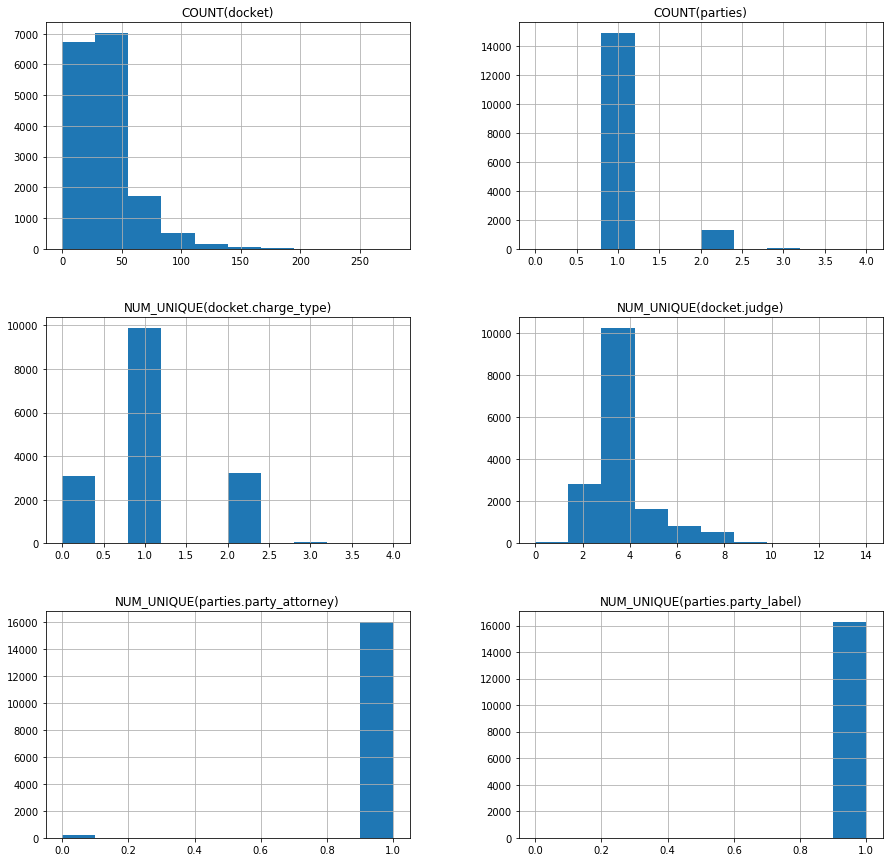

In [17]:
pd.DataFrame.hist(training_data[['COUNT(docket)',
       'NUM_UNIQUE(docket.judge)', 'NUM_UNIQUE(docket.charge_type)',
       'COUNT(parties)', 'NUM_UNIQUE(parties.party_attorney)',
       'NUM_UNIQUE(parties.party_label)']], figsize = [15,15])

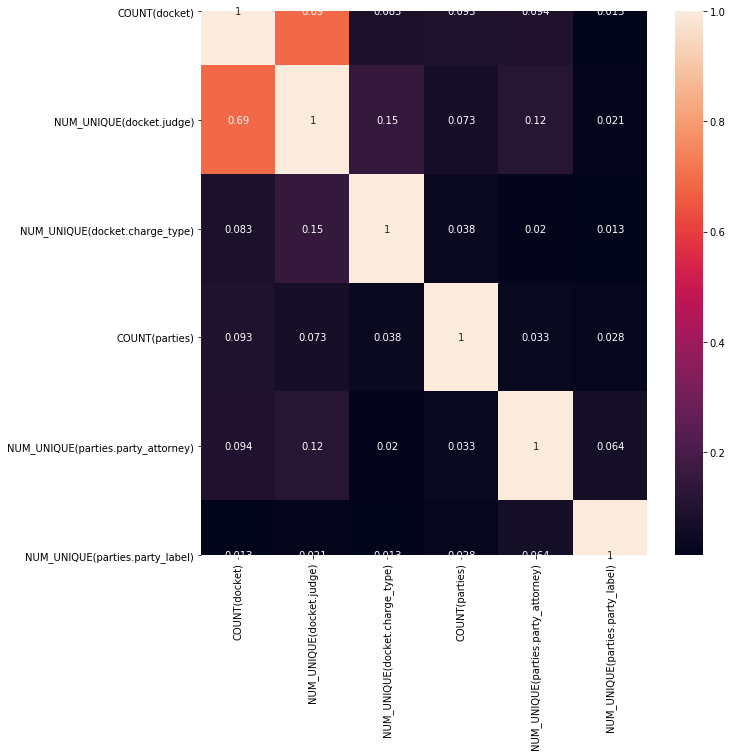

In [26]:
fta_corr = training_data[['COUNT(docket)',
       'NUM_UNIQUE(docket.judge)', 'NUM_UNIQUE(docket.charge_type)',
       'COUNT(parties)', 'NUM_UNIQUE(parties.party_attorney)',
       'NUM_UNIQUE(parties.party_label)']].corr()

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(fta_corr, annot=True)

In [17]:
FEATURES = list(training_data.columns[0: -1])
classification_results ={}

In [18]:
# Summarize Classification results

X_train = training_data[FEATURES]
y_train = training_data['label']
X_test = holdout_data[FEATURES]
y_test = holdout_data['label']

# Creating helper Functions to develop each individual model  
def build_model(classifier_fn):
    
    
       
    model = classifier_fn(X_train, y_train)
    
    y_pred = model.predict(X_test)

    y_pred_train = model.predict(X_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    feature_importance = model.feature_importances_
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab,
           'feat_importance':feature_importance,
           'model': model}


def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'accuracy': acc, 
            'precision': prec,
            'recall':recall, 
            'accuracy_count':num_acc}



def compare_results():
    for key in classification_results:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in classification_results[key]['training']:
            print(score, classification_results[key]['training'][score])

        print()
        print('Test data')
        for score in classification_results[key]['test']:
            print(score, classification_results[key]['test'][score])
       
        
        print()

## Save model out to pickle file

In [19]:

def decision_tree_fn(X_train, y_train, max_depth = None, max_features = None):
    
    model = DecisionTreeClassifier(max_leaf_nodes= 30)
    model.fit(X_train, y_train)
    
    return model

classification_results ['FTA ~ decision_tree'] = build_model(decision_tree_fn)

compare_results()

Classification:  FTA ~ decision_tree

Training data
accuracy 0.7736023125653484
precision 0.6588805641251653
recall 0.5836423970329885
accuracy_count 12578

Test data
accuracy 0.76875
precision 0.6898148148148148
recall 0.436950146627566
accuracy_count 861



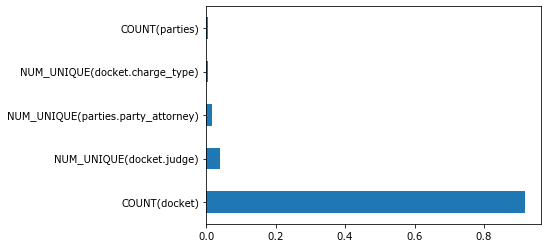

In [20]:
feat_results = classification_results['FTA ~ decision_tree']['feat_importance']

feat_importance = pd.Series(feat_results, index = FEATURES)
feat_importance.nlargest(5).plot(kind ='barh')

In [21]:
with open("tree.dot","w") as f:
    f = tree.export_graphviz(classification_results['FTA ~ decision_tree']['model'],
                            feature_names=FEATURES,
                            class_names = ['FTA', 'Non_FTA'],
                            rounded = True,
                            proportion = True,
                            precision = 2, 
                            filled = True,
                            out_file=f)

In [24]:
# converts dot file to png
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'adjmodel_tree.png', '-Gdpi=400'])

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'adj_model_tree.png')

In [25]:
# With Message Count
def random_forest_fn(X_train, y_train, n_estimators = None):
    
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    
    return model


classification_results ['FTA ~ random_forest'] = build_model(random_forest_fn)




In [26]:
compare_results()

Classification:  FTA ~ decision_tree

Training data
accuracy 0.7736023125653484
precision 0.6588805641251653
recall 0.5836423970329885
accuracy_count 12578

Test data
accuracy 0.76875
precision 0.6898148148148148
recall 0.436950146627566
accuracy_count 861

Classification:  FTA ~ random_forest

Training data
accuracy 0.941939848699182
precision 0.948486799742434
recall 0.8625805192270154
accuracy_count 15315

Test data
accuracy 0.7428571428571429
precision 0.6480446927374302
recall 0.34017595307917886
accuracy_count 832

